# Modeler

## Ejemplo 1. Placa plana

In [1]:
from nusa.mesh import Modeler

m = Modeler()
m.add_rectangle((0,0),(1,1), esize=0.05)
m.generate_mesh()
m.plot_mesh()

TypeError: len() of unsized object

## Ejemplo 2. Placa con agujero

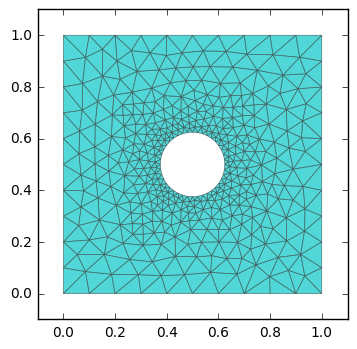

In [3]:
m = Modeler()
a = m.add_rectangle((0,0),(1,1), esize=0.1)
b = m.add_circle((0.5,0.5), 0.125, esize=0.02)
m.substract_surfaces(a,b)
m.generate_mesh()
m.plot_mesh()

## Ejemplo 3. Placa con grieta

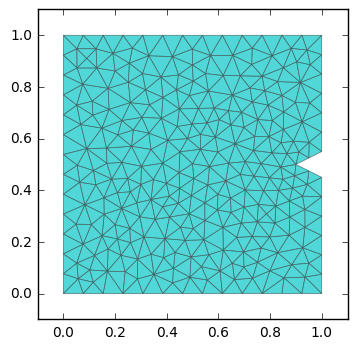

In [4]:
m = Modeler()
points = [
    (0,0),
    (1,0),
    (1,0.45),
    (0.9,0.5),
    (1,0.55),
    (1,1),
    (0,1)
]
a = m.add_poly(*points, esize=0.08)
m.generate_mesh()
m.plot_mesh()

## Placa con muesca

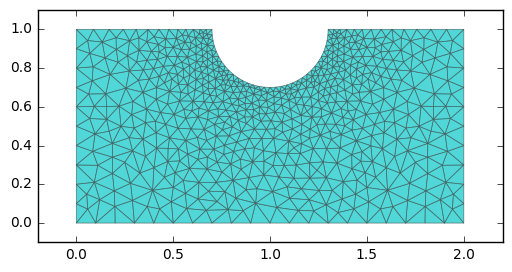

In [5]:
m = Modeler()
g = m.geom # Para acceder a la clase SimpleGMSH
p1 = g.add_point((0,0))
p2 = g.add_point((2,0))
p3 = g.add_point((2,1))
p4 = g.add_point((1.3,1), esize=0.03)
p5 = g.add_point((1,1))
p6 = g.add_point((0.7,1), esize=0.03)
p7 = g.add_point((0,1))
L1 = g.add_line(p1,p2)
L2 = g.add_line(p2,p3)
L3 = g.add_line(p3,p4)
L4 = g.add_circle(p5,p6,p4)
L5 = g.add_line(p6,p7)
L6 = g.add_line(p7,p1)
loop1 = g.add_line_loop(L1,L2,L3,"-"+L4,L5,L6)
g.add_plane_surface(loop1)
m.generate_mesh()
m.plot_mesh()

## Placa compuesta

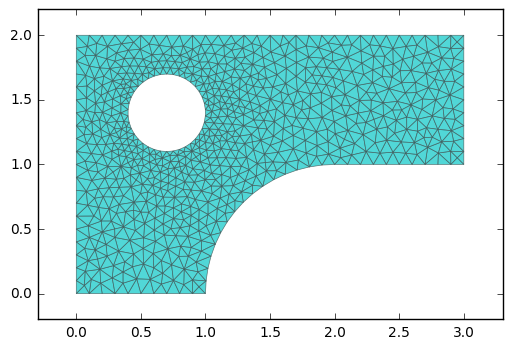

In [6]:
m = Modeler()
g = m.geom # Para acceder a la clase SimpleGMSH
p1 = g.add_point((0,0))
p2 = g.add_point((1,0))
p3 = g.add_point((2,0))
p4 = g.add_point((2,1))
p5 = g.add_point((3,1))
p6 = g.add_point((3,2))
p7 = g.add_point((0,2))
p8 = g.add_point((0.7,1.4))
p9 = g.add_point((0.7,1.7), esize=0.05)
L1 = g.add_line(p1,p2)
L2 = g.add_circle(p3,p2,p4)
L3 = g.add_line(p4,p5)
L4 = g.add_line(p5,p6)
L5 = g.add_line(p6,p7)
L6 = g.add_line(p7,p1)
L7 = g.add_circle(p8,p9)
loop1 = g.add_line_loop(L1,L2,L3,L4,L5,L6) # boundary
loop2 = g.add_line_loop(L7)# hole
g.add_plane_surface(loop1,loop2)
m.generate_mesh()
m.plot_mesh()